<a href="https://colab.research.google.com/github/andersonmdcanteli/wordle/blob/main/wordle_all_words_first_guess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mastering WORDLE Dataset 3: All words (PART 1)

This notebook contains part of the analyzes carried out to find the best words for the game ***WORLDE***.

The focus is on the dataset witth all words that can be used as guesses. For other datasets and a general discussion, see this [other notebook](https://colab.research.google.com/drive/1ulRd4zAWIo9Yq6GujbEX7eyp8XhXRCkO?usp=sharing).



## Libraries and versions

To perform this analysis, I'm using [Google Colab](https://colab.research.google.com/drive/1ulRd4zAWIo9Yq6GujbEX7eyp8XhXRCkO?usp=sharing), and the following libraries:

- Python: `3.7.13`
- Pandas: `1.3.5`
- NumPy: `1.21.6`
- matplotlib: `3.2.2`
- Seaborn: `0.11.2`
- SciPy: `1.7.3`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data collection and analysis

The list of words that are used as answers in the game is available in this [repository](https://gist.github.com/cfreshman/). The data is split into two datasets, which can be imported using pandas


In [2]:
df_allowed = pd.read_csv(
    "https://gist.githubusercontent.com/cfreshman/cdcdf777450c5b5301e439061d29694c/raw/b8375870720504ecf89c1970ea4532454f12de94/wordle-allowed-guesses.txt",
    header=None, 
    names=['words'])
df_allowed.head(2)

,words
0,aahed
1,aalii


In [3]:
df_answers = pd.read_csv(
    "https://gist.githubusercontent.com/cfreshman/a03ef2cba789d8cf00c08f767e0fad7b/raw/28804271b5a226628d36ee831b0e36adef9cf449/wordle-answers-alphabetical.txt",
    header=None, 
    names=['words'])
df_answers.head(2)

,words
0,aback
1,abase


We need to concatenate these two datasets:

In [4]:
df_wordle = pd.concat([df_answers, df_allowed], axis=0)
df_wordle.reset_index(drop=True, inplace=True)
df_wordle.head(2)

,words
0,aback
1,abase


In [5]:
df_wordle.describe().transpose()

,count,unique,top,freq
words,12972,12972,aback,1


The dataset contains 12972 unique words that can be used in the game.

Initially, we need to analyze the data. But before that, I'm going to add a new column in each `DataFrame` indicating the origin of the words, because in this way it is not possible to know the origin of the word.


In each data frame I will create a new column named `"source"`, and assign `0` to the `df_allowed` and `1` to the `df_answers`:

In [6]:
df_allowed['source'] = 0
df_allowed.head(2)

,words,source
0,aahed,0
1,aalii,0


In [7]:
df_answers['source'] = 1
df_answers.head(2)

,words,source
0,aback,1
1,abase,1


Now we just need to concatenate the `DataFrames` again, and we can proceed with the analysis.

In [8]:
df_wordle = pd.concat([df_answers, df_allowed], axis=0)
df_wordle.reset_index(drop=True, inplace=True)
df_wordle.head(2)

,words,source
0,aback,1
1,abase,1


One of the main pieces of information is the frequency of each letter in the words. To obtain this data, I will create a new column with a list where each element contains a single letter.

To do this I will apply the `list` function on column `"words"`

In [9]:
df_wordle['letters'] = df_wordle['words'].apply(list)
df_wordle.head(2)

,words,source,letters
0,aback,1,"[a, b, a, c, k]"
1,abase,1,"[a, b, a, s, e]"


Next, let's create a new `DataFrame` containing five columns. Each column will contain the letter in its respective word position. That way, each cell will contain a single letter, and each row will contain a single word.

To do this, we can use method `to_list()` on column `"letters"` when creating the new `DataFrame`:

In [10]:
df_wordle_letters = pd.DataFrame(df_wordle['letters'].to_list(), columns=np.arange(1, 6)).copy()
df_wordle_letters.head(2)

,1,2,3,4,5
0,a,b,a,c,k
1,a,b,a,s,e


Now we need to count the number of letters contained in the dataset. This is easily done using `pd.value_counts`:

In [11]:
df_wordle_letters = df_wordle_letters.apply(pd.value_counts)
df_wordle_letters.head(2)

,1,2,3,4,5
a,737,2263,1236,1074,680
b,909,81,335,243,59


The dataset contains:
- `737` letters `a` in the first position of the words;
- `2263` letters `a` in the second position of the words;
- `1236` letters `a` in the third position of the words;
- `1074` letters `a` in the fourth position of the words;
- `680` letters `a` in the fifth position of the words.



To get the total count of each letter, we just need sum the number of letters in each row (`axis=1`):


In [12]:
df_wordle_letters['sum'] = df_wordle_letters.sum(axis=1)
df_wordle_letters.head(2)

,1,2,3,4,5,sum
a,737,2263,1236,1074,680,5990
b,909,81,335,243,59,1627


Now we need the total letters in the dataset to get the frequency of each word. To do this, just sum all column `"sum"`:

In [13]:
letters_count_wordle = df_wordle_letters['sum'].sum()
letters_count_wordle

64860

Hence, the dataset contains 64860 letters, which corresponds to the total number of words times the number of letters in each word ($12972 \times 5=64860$). 

The frequency of each letter is the letter count divided by the total number of letters; that is:

In [14]:
df_wordle_letters['frequency_wordle'] = df_wordle_letters['sum']/letters_count_wordle
df_wordle_letters.head(2)

,1,2,3,4,5,sum,frequency_wordle
a,737,2263,1236,1074,680,5990,0.092353
b,909,81,335,243,59,1627,0.025085


To get a better view, we can plot a bar chart:

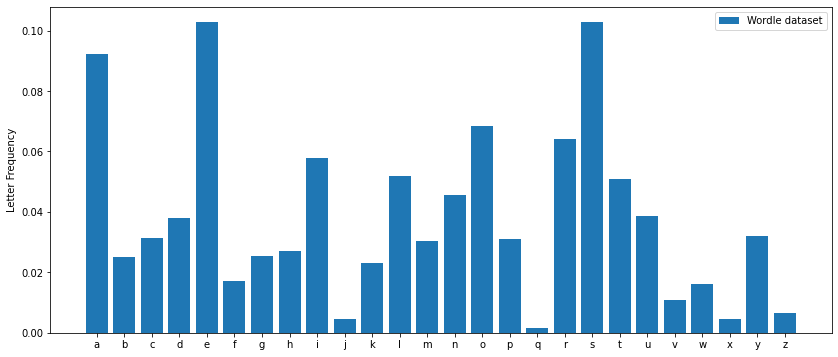

In [15]:
plt.figure(figsize=(14,6))
plt.bar(df_wordle_letters.index, df_wordle_letters['frequency_wordle'], label="Wordle dataset")
plt.ylabel("Letter Frequency")
plt.legend()
plt.show()

To know which letters are most frequent, we can sort the data and plot the graph again:

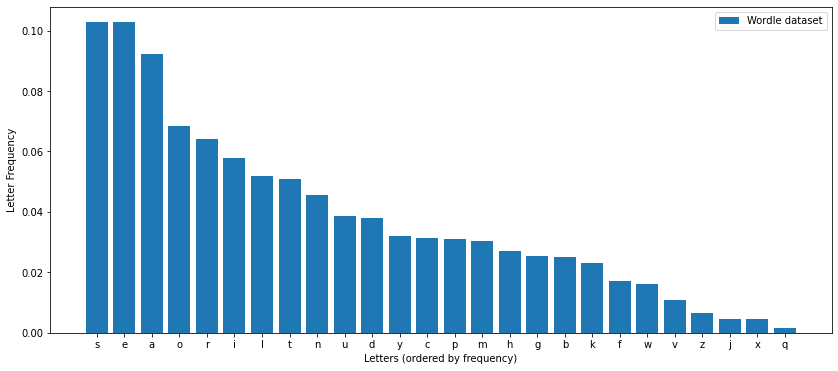

In [16]:
df_aux = df_wordle_letters.sort_values(by='frequency_wordle', ascending=False).copy() 
plt.figure(figsize=(14,6))
plt.bar(df_aux.index, df_aux['frequency_wordle'], label="Wordle dataset")
plt.ylabel("Letter Frequency")
plt.xlabel("Letters (ordered by frequency)")
plt.legend()
plt.show()

The letter `s` is the most frequent letter, followed by the letters `e`, `a`, `o` and `r`. Less frequent letters are the letters `q`, `x`, `j`, `z` and `v`.

Hence, words containing the letters `s`, `e`, `a`, `o` and `t` should be better guesses. Let's find out which ones they are! 



## Strength of each word

To estimate the Strength of each word I will create an auxiliary `DataFrame` with each letter separated in a single cell:

In [17]:
df_wordle_aux = pd.DataFrame(df_wordle['letters'].to_list(), columns=range(1,6))
df_wordle_aux.head(2)

,1,2,3,4,5
0,a,b,a,c,k
1,a,b,a,s,e


And I will also create a `DataFrame` with just the frequencies of each letter:

In [18]:
df_freq_wordle = pd.DataFrame(data=df_wordle_letters['frequency_wordle'])
df_freq_wordle.head(2)

,frequency_wordle
a,0.092353
b,0.025085


This data frame contains the estimated strength for each letter, regardless of the position the letter occupies in the word. I will export this dataset as it will be used in other analyses. This dataset is available at [this link](https://drive.google.com/file/d/1jnjwMVHburi-NbWcUZvG4uo976DY_E6b/view?usp=sharing).

In [19]:
df_freq_wordle.to_csv("df_freq_wordle.csv", index=True)

Now we can use the frequency estimated for each `letter` to find the strength for each word. We just need to replace each `letter` on the `df_wordle_aux` for its corresponding frequency (`df_freq_wordle`):

In [20]:
for i in df_freq_wordle.index:
  df_wordle_aux.replace(i, df_freq_wordle['frequency_wordle'][i], inplace=True)
df_wordle_aux.head(2)

,1,2,3,4,5
0,0.092353,0.025085,0.092353,0.031267,0.023204
1,0.092353,0.025085,0.092353,0.102760,0.102714


Now, we need to sum each row

In [21]:
df_wordle_aux['strength'] = df_wordle_aux.sum(axis=1)
df_wordle_aux.head(2)

,1,2,3,4,5,strength
0,0.092353,0.025085,0.092353,0.031267,0.023204,0.264261
1,0.092353,0.025085,0.092353,0.102760,0.102714,0.415264


Since the row indices are the same, we can allocate the estimated strength directly to the `DataFrame` `df_wordle`:

In [22]:
df_wordle['strength'] = df_wordle_aux['strength'].copy()
df_wordle['strength'] = df_wordle['strength'].round(7)
df_wordle.head(2)

,words,source,letters,strength
0,aback,1,"[a, b, a, c, k]",0.264261
1,abase,1,"[a, b, a, s, e]",0.415264


NOTE: Column `"strength"` has been rounded to 7 decimal places to prevent mistakes due to decimal fluctuations.

The best words are going to be the ones that have the highest "strength". For this, I will create a new column called `"rank"` by applying the `rank` function to the `"strength"` column:

In [23]:
df_wordle['rank'] = df_wordle['strength'].rank(ascending=False, method="dense").astype(int)
df_wordle.head(2)

,words,source,letters,strength,rank
0,aback,1,"[a, b, a, c, k]",0.264261,3948
1,abase,1,"[a, b, a, s, e]",0.415264,104


Hence, the **TOP 10 words** are:

In [24]:
df_wordle[df_wordle['rank'] <= 10].sort_values(by='rank')

,words,source,letters,strength,rank
5116,esses,0,"[e, s, s, e, s]",0.513706,1
2796,asses,0,"[a, s, s, e, s]",0.503346,2
10240,sasse,0,"[s, a, s, s, e]",0.503346,2
10442,sessa,0,"[s, e, s, s, a]",0.503346,2
4957,eases,0,"[e, a, s, e, s]",0.503299,3
10355,sease,0,"[s, e, a, s, e]",0.503299,3
9851,reses,0,"[r, e, s, e, s]",0.475054,4
10428,seres,0,"[s, e, r, e, s]",0.475054,4
10375,seers,0,"[s, e, e, r, s]",0.475054,4
5104,erses,0,"[e, r, s, e, s]",0.475054,4


## Adding penalty for words with repeated letters

As we obtained in the previous analyses, the words with repeated letters were well classified. Words with the letter s repeated 3 times were the best, as the letter s is the most frequent letter in the dataset. But this behavior is not useful for our purposes, as repeating letters on the first guess reduces our chances!

So we need to apply a penalty to words that have repeated letters. For this, I will use the same strategy adopted in other analyses.

To apply this penalty, we need to know which words contain repeated letters. To figure this out, I'm going to apply a function (`unique`) that returns only the single letters of a string and also maintains the order of the letters in the word.

In [25]:
def unique(sequence):
  # source  https://stackoverflow.com/a/58666031/17872198
  seen = set()
  return [x for x in sequence if not (x in seen or seen.add(x))]
## example
unique("juliana")

['j', 'u', 'l', 'i', 'a', 'n']

In [26]:
df_wordle['unique_letters'] = df_wordle['letters'].apply(unique).apply("".join)
df_wordle.head(2)

,words,source,letters,strength,rank,unique_letters
0,aback,1,"[a, b, a, c, k]",0.264261,3948,abck
1,abase,1,"[a, b, a, s, e]",0.415264,104,abse


Now we need to count the number of letters left after removing the repeated letters. For this, we can use the `len` function in the `"unique_letters"` column:

In [27]:
df_wordle['count_unique'] = df_wordle['unique_letters'].str.len()
df_wordle.head(2)

,words,source,letters,strength,rank,unique_letters,count_unique
0,aback,1,"[a, b, a, c, k]",0.264261,3948,abck,4
1,abase,1,"[a, b, a, s, e]",0.415264,104,abse,4


To find out how many words contain 5 unique letters we can use the `value_counts` method:

In [28]:
df_wordle['count_unique'].value_counts()

5    8322
4    4185
3     456
2       9
Name: count_unique, dtype: int64

Out of curiosity, let's find out the word that contains only 2 unique letters. To do this, we just need a filter:

In [29]:
df_wordle[df_wordle['count_unique'] == 2]

,words,source,letters,strength,rank,unique_letters,count_unique
1189,mamma,1,"[m, a, m, m, a]",0.276102,3489,ma,2
2628,anana,0,"[a, n, a, n, a]",0.368085,541,an,2
2888,ayaya,0,"[a, y, a, y, a]",0.341011,1106,ay,2
4043,cocco,0,"[c, o, c, c, o]",0.230651,5134,co,2
5116,esses,0,"[e, s, s, e, s]",0.513706,1,es,2
8364,nanna,0,"[n, a, n, n, a]",0.321246,1706,na,2
9004,peepe,0,"[p, e, e, p, e]",0.370398,508,pe,2
11245,susus,0,"[s, u, s, u, s]",0.385708,295,su,2
11329,taata,0,"[t, a, a, t, a]",0.378662,382,ta,2


Now it is necessary to decide a criterion for penalizing words with repeated letters. As the more repeated letters, the worse the guess, the penalty should be greater the more repeated letters the word has.

The criterion I will use is very simple: for each repeated letter, the word must lose 20% of its strength. That is:

- words with `5` unique letters should not be penalized;
- words with `4` unique letters must lose 20% of their strength;
- words with `3` unique letters must lose 40% of their strength;
- words with `2` unique letters must lose 60% of their strength;

We can write a simple function that will do this task:

In [30]:
def penalty_func(x):
  if x == 5:
    return 1
  elif x == 4:
    return 0.8
  elif x == 3:
    return 0.6
  elif x == 2:
    return 0.4
  else:
    return 0.2

Now we just need to create a new column with the penalty (correction factor):

In [31]:
df_wordle['penalty'] = df_wordle['count_unique'].apply(penalty_func)
df_wordle.head(2)

,words,source,letters,strength,rank,unique_letters,count_unique,penalty
0,aback,1,"[a, b, a, c, k]",0.264261,3948,abck,4,0.8
1,abase,1,"[a, b, a, s, e]",0.415264,104,abse,4,0.8


To apply the penalty, simply multiply column `"strength"` by the `"penalty"` column:

In [32]:
df_wordle['strength_penalty'] = df_wordle['strength']*df_wordle['penalty']
df_wordle['strength_penalty'] = df_wordle['strength_penalty'].round(7)
df_wordle.head(2)

,words,source,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty
0,aback,1,"[a, b, a, c, k]",0.264261,3948,abck,4,0.8,0.211409
1,abase,1,"[a, b, a, s, e]",0.415264,104,abse,4,0.8,0.332211


Finally, we can create a new ranking based on the `"strength_penalty"` column:

In [33]:
df_wordle['rank_penalty'] = df_wordle['strength_penalty'].rank(ascending=False, method="dense").astype(int)
df_wordle.head(2)

,words,source,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty
0,aback,1,"[a, b, a, c, k]",0.264261,3948,abck,4,0.8,0.211409,5572
1,abase,1,"[a, b, a, s, e]",0.415264,104,abse,4,0.8,0.332211,548


Hence, the **TOP 5 best words**:

In [34]:
df_wordle[df_wordle['rank_penalty'] <= 5].sort_values(by='rank_penalty')

,words,source,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty
108,arose,1,"[a, r, o, s, e]",0.430358,56,arose,5,1.0,0.430358,1
2427,aeros,0,"[a, e, r, o, s]",0.430358,56,aeros,5,1.0,0.430358,1
10845,soare,0,"[s, o, a, r, e]",0.430358,56,soare,5,1.0,0.430358,1
105,arise,1,"[a, r, i, s, e]",0.419889,84,arise,5,1.0,0.419889,2
1534,raise,1,"[r, a, i, s, e]",0.419889,84,raise,5,1.0,0.419889,2
2428,aesir,0,"[a, e, s, i, r]",0.419889,84,aesir,5,1.0,0.419889,2
10424,serai,0,"[s, e, r, a, i]",0.419889,84,serai,5,1.0,0.419889,2
9729,reais,0,"[r, e, a, i, s]",0.419889,84,reais,5,1.0,0.419889,2
2572,aloes,0,"[a, l, o, e, s]",0.418224,87,aloes,5,1.0,0.418224,3
11688,toeas,0,"[t, o, e, a, s]",0.417052,94,toeas,5,1.0,0.417052,4


## Adding weights due to letter position in the word

Note that the words `arose`, `aeros` and `soare` have the same strength as they are *anagrams*. But they are not the same. We need to take into account the position of each letter on the word. Let's look at the word count that contains the letter `a`:

In [35]:
df_wordle_letters.loc[["a"]]

,1,2,3,4,5,sum,frequency_wordle
a,737,2263,1236,1074,680,5990,0.092353


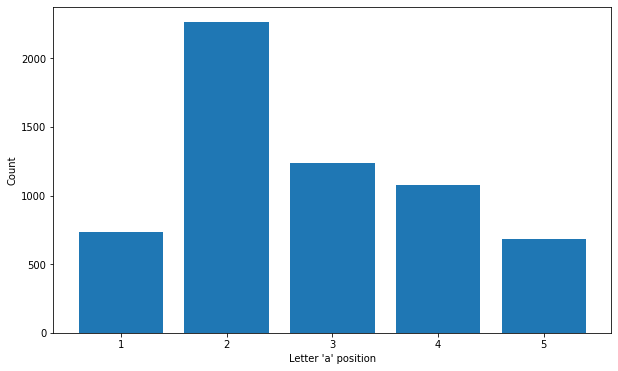

In [36]:
plt.figure(figsize=(10,6))
plt.bar(list(df_wordle_letters.columns[:5]), df_wordle_letters.loc[["a"], :5].values.flatten().tolist())
plt.xlabel("Letter 'a' position")
plt.ylabel("Count")
plt.show()

Based only on the letter `"a"` count in each of the five possible positions, the word `"soare"` should be ranked better than the word `"aeros"` and `"arose"` because the letter `"a"` is in a position where it occurs more often.

To get a better look at this, let's plot a heatmap. For this, I will create a new `DataFrame` with the five columns containing the count of each letter in the respective position (filtering the `DataFrame` `df_wordle_letters`):

In [37]:
df_wordle_letters_position = df_wordle_letters[[1, 2, 3, 4, 5]].copy()
df_wordle_letters_position.head(2)

,1,2,3,4,5
a,737,2263,1236,1074,680
b,909,81,335,243,59


Now we can plot a heatmap using seaborn:

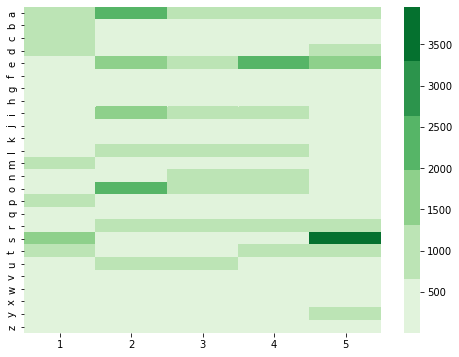

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_wordle_letters_position[[1, 2, 3, 4, 5]], cmap=sns.color_palette("Greens"))
plt.show()

We can see that the letter `"s"` has a much higher occurrence in the first last than in the others. Similarly, the letter `"y"` occurs more often in the fifth position. The letter `"e"` occurs predominantly in positions 2, 4 and 5. Letter `"a"` is more common on the second position.

Hence, considering where the letter is in the word is an important criterion to decide which word is the best. 

To estimate the strength of each word by position, simply divide the frequency of the letter in a position by the total number of letters in the respective position. We can use a loop to loop through the columns as follows:

In [39]:
for i in range(1,6):
  df_wordle_letters_position[i] = df_wordle_letters_position[i]/df_wordle_letters_position[i].sum()
df_wordle_letters_position.head(2)

,1,2,3,4,5
a,0.056815,0.174453,0.095282,0.082794,0.052421
b,0.070074,0.006244,0.025825,0.018733,0.004548


The sum in each column must equal 1:

In [40]:
for i in range(1,6):
  print(df_wordle_letters_position[i].sum())

1.0000000000000002
1.0
0.9999999999999999
1.0
1.0


We repeat the heatmap, but with estimated weights for each word in each position annotate:

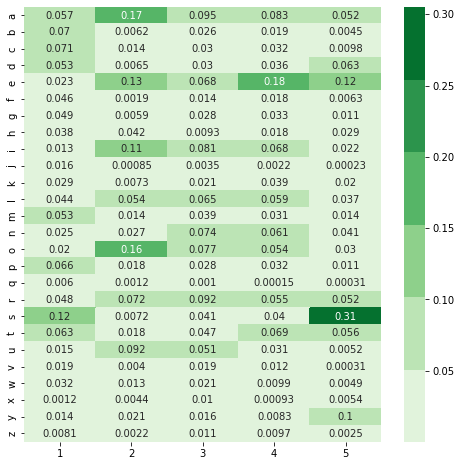

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_wordle_letters_position[[1, 2, 3, 4, 5]].fillna(0), cmap=sns.color_palette("Greens"), annot=True)
plt.show()

We can use the matrix that contains the weights to consider the position of each letter in the word. To do this, we just need to multiply each probability by the respective weight:

In [42]:
df_freq_weigth_wordle = pd.DataFrame(columns=range(1,6))
for i in range(1,6):
  df_freq_weigth_wordle[i] = df_wordle_letters_position[i]*df_freq_wordle['frequency_wordle']
df_freq_weigth_wordle.head(2)

,1,2,3,4,5
a,0.005247,0.016111,0.008800,0.007646,0.004841
b,0.001758,0.000157,0.000648,0.000470,0.000114


This data frame contains the estimated strength for each letter, considering the position that the letter occupies in the word. I will export this dataset as it will be used in other analyses. This dataset is available at [this link](
https://drive.google.com/file/d/1YMLhEZ0zEtzAHtk1geI60-CgLqtYuF1x/view?usp=sharing).

In [43]:
df_freq_weigth_wordle.to_csv("df_freq_weigth_wordle.csv", index=True)

Now I will recreate the auxiliary dataframe:

In [44]:
df_wordle_aux = pd.DataFrame(df_wordle['letters'].to_list(), columns=range(1,6))
df_wordle_aux.head(2)

,1,2,3,4,5
0,a,b,a,c,k
1,a,b,a,s,e


And then, I will replace each letter by its respective frequency, but using the frequencies with the weight of the position considered:

In [45]:
for column in df_freq_weigth_wordle.columns:
  for i in df_freq_weigth_wordle.index:
    df_wordle_aux[column].replace(i, df_freq_weigth_wordle[column][i], inplace=True)
df_wordle_aux.head(2)

,1,2,3,4,5
0,0.005247,0.000157,0.0088,0.000991,0.000463
1,0.005247,0.000157,0.0088,0.004088,0.012051


Now, we just  need to sum each row:

In [46]:
df_wordle_aux['strength'] = df_wordle_aux.sum(axis=1)
df_wordle_aux.head(2)

,1,2,3,4,5,strength
0,0.005247,0.000157,0.0088,0.000991,0.000463,0.015657
1,0.005247,0.000157,0.0088,0.004088,0.012051,0.030342


Now we concatenate this this other way of estimating the strength of words in the original `DataFrame`:

In [47]:
df_wordle['strength_weight'] = df_wordle_aux['strength'].copy()
df_wordle['strength_weight'] = df_wordle['strength_weight'].round(7)
df_wordle.head()

,words,source,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty,strength_weight
0,aback,1,"[a, b, a, c, k]",0.264261,3948,abck,4,0.8,0.211409,5572,0.015657
1,abase,1,"[a, b, a, s, e]",0.415264,104,abse,4,0.8,0.332211,548,0.030342
2,abate,1,"[a, b, a, t, e]",0.363306,626,abte,4,0.8,0.290644,1958,0.029771
3,abbey,1,"[a, b, b, e, y]",0.277212,3445,abey,4,0.8,0.221770,5216,0.027684
4,abbot,1,"[a, b, b, o, t]",0.261748,4049,abot,4,0.8,0.209399,5649,0.012580


Finally, we can apply the penalty due to word repetition:

In [48]:
df_wordle['strength_weight_penalty'] = df_wordle['strength_weight']*df_wordle['penalty']
df_wordle['strength_weight_penalty'] = df_wordle['strength_weight_penalty'].round(7)
df_wordle.head(2)

,words,source,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty,strength_weight,strength_weight_penalty
0,aback,1,"[a, b, a, c, k]",0.264261,3948,abck,4,0.8,0.211409,5572,0.015657,0.012526
1,abase,1,"[a, b, a, s, e]",0.415264,104,abse,4,0.8,0.332211,548,0.030342,0.024274


and create a new ranking for the words:

In [49]:
df_wordle['rank_weight_penalty'] = df_wordle['strength_weight_penalty'].rank(ascending=False, method="dense").astype(int)
df_wordle.head(2)

,words,source,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty,strength_weight,strength_weight_penalty,rank_weight_penalty
0,aback,1,"[a, b, a, c, k]",0.264261,3948,abck,4,0.8,0.211409,5572,0.015657,0.012526,11694
1,abase,1,"[a, b, a, s, e]",0.415264,104,abse,4,0.8,0.332211,548,0.030342,0.024274,7324


Hence, the **TOP 10 words** are:

In [50]:
df_wordle[['words', 'source', 'rank', 'rank_penalty', 'rank_weight_penalty']][df_wordle['rank_weight_penalty'] <= 10].sort_values(by='rank_weight_penalty')

,words,source,rank,rank_penalty,rank_weight_penalty
11415,tares,0,109,6,1
7313,lares,0,106,5,2
3738,cares,0,222,20,3
8917,pares,0,226,21,4
4412,dares,0,177,13,5
2995,bares,0,283,31,6
7828,mares,0,230,22,7
5703,gares,0,278,29,8
8378,nares,0,133,9,9
6241,hares,0,263,24,10


And the **WORST 10 words** are:

In [51]:
df_wordle[['words', 'source', 'rank', 'rank_penalty', 'rank_weight_penalty']][df_wordle['rank_weight_penalty'] >= (df_wordle['rank_weight_penalty'].max() - 9)].sort_values(by='rank_weight_penalty')

,words,source,rank,rank_penalty,rank_weight_penalty
11999,uhuru,0,5731,7070,12786
9094,phpht,0,6249,7144,12787
5075,enzym,0,5515,5369,12788
6151,gyppy,0,6323,7153,12789
6634,immix,0,6125,7124,12790
6576,hyphy,0,6330,7154,12791
12692,xylyl,0,6211,7141,12792
774,fluff,1,6347,7160,12793
12051,undug,0,6061,6914,12794
12058,ungum,0,6149,6963,12795


## Rethinking frequencies and weights

In this notebook we find out which are the best words to use as a first try. However, the dataset contains a greater number of words that cannot be the word of the day, reducing the chances of getting it right on the first try. This is evident when looking at the top 10 words, where none are part of the dataset that contains possible words of the day.


In [52]:
df_wordle[['words', 'source', 'rank', 'rank_penalty', 'rank_weight_penalty']][df_wordle['source'] == 1].sort_values(by='rank_weight_penalty').head()

,words,source,rank,rank_penalty,rank_weight_penalty
1643,saner,1,133,9,970
2084,torus,1,1591,716,1127
1633,safer,1,373,53,1461
1557,rebus,1,1317,522,1643
241,bonus,1,3312,2421,1701


The first word that could be the word of the day was ranked at position 970 (`"saner"`)!

To fix this, instead of using the frequencies and weights estimated for the `df_wordle` we can use the results obtained for the `df_answers` dataset.

First, I will remove some columns to improve the visualization of the results:

In [53]:
df_wordle.drop(["strength", "rank", "unique_letters",	"count_unique",	"strength_penalty",	"rank_penalty",	"strength_weight",	"strength_weight_penalty"],
                inplace=True,
                axis=1)
df_wordle.head(2)

,words,source,letters,penalty,rank_weight_penalty
0,aback,1,"[a, b, a, c, k]",0.8,11694
1,abase,1,"[a, b, a, s, e]",0.8,7324


Now I will import the frequencies considering the position of the letters in the word obtained for the dataset that contains only the possible answers:

In [54]:
url_answers = 'https://drive.google.com/file/d/10vlb5SJCO3uNIKHghS7spP-SeKvwPAxA/view?usp=sharing'
url_answers = 'https://drive.google.com/uc?id=' + url_answers.split('/')[-2]
df_freq_weights_answers = pd.read_csv(url_answers, index_col=0)
df_freq_weights_answers.head(2)

,1,2,3,4,5
a,0.005151,0.011107,0.011216,0.005955,0.002338
b,0.001814,0.000168,0.000598,0.000252,0.000115


Before using this data, it is necessary to transform the column name from string to integer, which is done as follows:

In [55]:
df_freq_weights_answers.columns = df_freq_weights_answers.columns.astype(int) 

Then we just need to follow the same steps as before, but using this other dataset. I need to recreate the auxiliary dataframe:


In [56]:
df_wordle_aux = pd.DataFrame(df_wordle['letters'].to_list(), columns=range(1,6))
df_wordle_aux.head(2)

,1,2,3,4,5
0,a,b,a,c,k
1,a,b,a,s,e


And then, I will replace each letter by its respective frequency, but using the new dataset:

In [57]:
for column in df_freq_weights_answers.columns:
  for i in df_freq_weights_answers.index:
    df_wordle_aux[column].replace(i, df_freq_weights_answers[column][i], inplace=True)
df_wordle_aux.head(2)

,1,2,3,4,5
0,0.005151,0.000168,0.011216,0.002706,0.000886
1,0.005151,0.000168,0.011216,0.004269,0.019510


Now, we just  need to sum each row:

In [58]:
df_wordle_aux['strength'] = df_wordle_aux.sum(axis=1)
df_wordle_aux.head(2)

,1,2,3,4,5,strength
0,0.005151,0.000168,0.011216,0.002706,0.000886,0.020127
1,0.005151,0.000168,0.011216,0.004269,0.019510,0.040315


Now we concatenate this this other way of estimating the strength of words in the original `DataFrame`:

In [59]:
df_wordle['strength_answers'] = df_wordle_aux['strength'].round(7).copy()
df_wordle.head(2)

,words,source,letters,penalty,rank_weight_penalty,strength_answers
0,aback,1,"[a, b, a, c, k]",0.8,11694,0.020127
1,abase,1,"[a, b, a, s, e]",0.8,7324,0.040315


Finally, we can apply the penalty due to word repetition:

In [60]:
df_wordle['strength_answers_penalty'] = df_wordle['strength_answers']*df_wordle['penalty']
df_wordle['strength_answers_penalty'] = df_wordle['strength_answers_penalty'].round(7)
df_wordle.head(2)

,words,source,letters,penalty,rank_weight_penalty,strength_answers,strength_answers_penalty
0,aback,1,"[a, b, a, c, k]",0.8,11694,0.020127,0.016102
1,abase,1,"[a, b, a, s, e]",0.8,7324,0.040315,0.032252


and create a new ranking for the words:

In [61]:
df_wordle['rank_answers'] = df_wordle['strength_answers_penalty'].rank(ascending=False, method="dense").astype(int)
df_wordle.head(2)

,words,source,letters,penalty,rank_weight_penalty,strength_answers,strength_answers_penalty,rank_answers
0,aback,1,"[a, b, a, c, k]",0.8,11694,0.020127,0.016102,9184
1,abase,1,"[a, b, a, s, e]",0.8,7324,0.040315,0.032252,1350


Hence, the **TOP 10 words** are:

In [62]:
df_wordle[df_wordle['rank_answers'] <= 10].sort_values(by='rank_answers')

,words,source,letters,penalty,rank_weight_penalty,strength_answers,strength_answers_penalty,rank_answers
10845,soare,0,"[s, o, a, r, e]",1.0,1818,0.052814,0.052814,1
10167,saine,0,"[s, a, i, n, e]",1.0,1805,0.050321,0.050321,2
10718,slane,0,"[s, l, a, n, e]",1.0,3736,0.049163,0.049163,3
10160,saice,0,"[s, a, i, c, e]",1.0,2093,0.049121,0.049121,4
1777,slate,1,"[s, l, a, t, e]",1.0,3578,0.049039,0.049039,5
10847,soave,0,"[s, o, a, v, e]",1.0,2473,0.047977,0.047977,6
10228,saree,0,"[s, a, r, e, e]",0.8,1257,0.059855,0.047884,7
458,crane,1,"[c, r, a, n, e]",1.0,5301,0.047114,0.047114,8
1908,stare,1,"[s, t, a, r, e]",1.0,3943,0.047058,0.047058,9
1711,share,1,"[s, h, a, r, e]",1.0,3904,0.047054,0.047054,10


Although the best word is not a possible hit, we now have a word in the fifth position (`"slate"`) 

And the **WORST 10 words** are:

In [63]:
df_wordle[df_wordle['rank_answers'] >= (df_wordle['rank_answers'].max() - 9)].sort_values(by='rank_answers')

,words,source,letters,penalty,rank_weight_penalty,strength_answers,strength_answers_penalty,rank_answers
6575,hypha,0,"[h, y, p, h, a]",0.8,12727,0.004906,0.003925,12677
6150,gyppo,0,"[g, y, p, p, o]",0.8,12782,0.004811,0.003849,12678
7054,kibbi,0,"[k, i, b, b, i]",0.6,12761,0.006340,0.003804,12679
7207,kudzu,0,"[k, u, d, z, u]",0.8,12785,0.004546,0.003636,12680
6634,immix,0,"[i, m, m, i, x]",0.6,12790,0.005986,0.003592,12681
5589,fuffs,0,"[f, u, f, f, s]",0.6,8352,0.005823,0.003494,12682
7212,kukus,0,"[k, u, k, u, s]",0.6,8108,0.005820,0.003492,12683
6872,jujus,0,"[j, u, j, u, s]",0.6,8362,0.005593,0.003356,12684
6639,imshi,0,"[i, m, s, h, i]",0.8,12755,0.003979,0.003183,12685
12026,umphs,0,"[u, m, p, h, s]",1.0,4679,0.003123,0.003123,12686


The analysis to choose the best pair of words to use in the first two attempts follows in [this notebook](https://colab.research.google.com/drive/1s9Uqi8BPLoPthv_SxiDHIcjwPKOZsgU5?usp=sharing).